# <b> Laboratório 5

Aluno: Rafael Mendes Campello

Referência: https://ecee.colorado.edu/~mathys/ecen4652/lab05/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ModuleLab1
import ModuleLab4
import ModuleLab5
from importlib import reload
from Resources import comsig
reload(ModuleLab5)

<module 'ModuleLab5' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab5/ModuleLab5.py'>

# E1

## a

A única adição necessária ao código fornecido é análoga ao que foi feito no Lab2 (uso de mascaramento no caso em que o plot é feito na escala normalizada em dB).

In [2]:
reload(ModuleLab5)

<module 'ModuleLab5' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab5/ModuleLab5.py'>

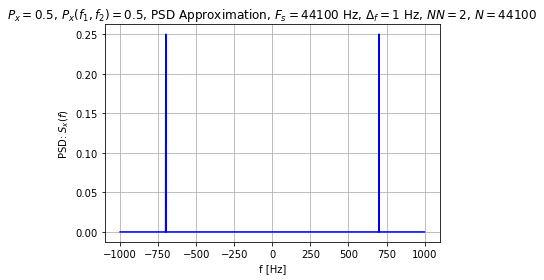

In [3]:
Fs = 44100
# Sampling rate
f1 = 700
# Test frequency 1
f2 = 720
# Test frequency 1
tlen = 2
# Duration in seconds
tt = np.arange(round(tlen*Fs))/float(Fs) # Time axis
x1t = np.sin(2*np.pi*f1*tt)
# Sine with freq f1
x2t = 0.01*np.cos(2*np.pi*f2*tt) # Attenuated cosine with freq f2
sig_xt = comsig.sigWave(x1t+x2t, Fs, 0) # Combined sinusoidal signal
_, _ = ModuleLab5.showpsd(sig_xt,[-1000, 1000, 0],Fs) #Plot S_x(f)

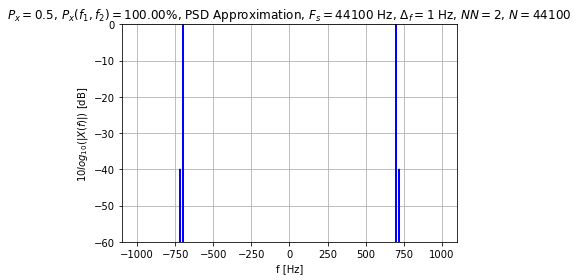

In [4]:
Fs = 44100
# Sampling rate
f1 = 700
# Test frequency 1
f2 = 720
# Test frequency 1
tlen = 2
# Duration in seconds
tt = np.arange(round(tlen*Fs))/float(Fs) # Time axis
x1t = np.sin(2*np.pi*f1*tt)
# Sine with freq f1
x2t = 0.01*np.cos(2*np.pi*f2*tt) # Attenuated cosine with freq f2
sig_xt = comsig.sigWave(x1t+x2t, Fs, 0) # Combined sinusoidal signal
_, _ = ModuleLab5.showpsd(sig_xt,[-1000, 1000, -60], Fs) #Plot S_x(f)

## b

Novamentes, pequenas adições são feitas na função fornecida: Obtemos $P_x$ total somando todo o vetor $\texttt{Sxf}$ e obtemos $P_x(f_1, f_2)$ somando o vetor $\texttt{Sxf}$ apenas dentro do intervalo $[f_1, f_2]$. Adiciona-se essas informação no título dos gráficos, conforme feito no material.

In [5]:
reload(ModuleLab5)

<module 'ModuleLab5' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab5/ModuleLab5.py'>

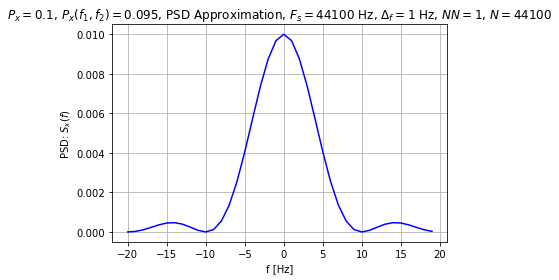

In [6]:
Fs = 44100
# Sampling rate
tlen = 1
# Duration in seconds
tt = np.arange(round(tlen*Fs))/float(Fs) # Time axis
x = np.zeros(tt.size)
for i in range(len(x)):
    if tt[i] <= 0.1:
        x[i] = 1
# Sine with freq f1
sig_xt = comsig.sigWave(x, Fs, 0) # Combined sinusoidal signal
_, _ = ModuleLab5.showpsd(sig_xt,[-20, 20, 0], Fs) #Plot S_x(f)

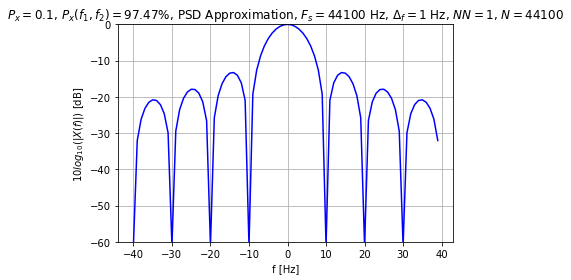

In [7]:
Fs = 44100
# Sampling rate
tlen = 1
# Duration in seconds
tt = np.arange(round(tlen*Fs))/float(Fs) # Time axis
x = np.zeros(tt.size)
for i in range(len(x)):
    if tt[i] <= 0.1:
        x[i] = 1
# Sine with freq f1
sig_xt = comsig.sigWave(x, Fs, 0) # Combined sinusoidal signal
_, _ = ModuleLab5.showpsd(sig_xt,[-40, 40, -60], Fs) #Plot S_x(f)

## c

Abaixo são mostrados os gráficos para os 3 pulsos pedidos. Vale notar que a porcentagem exata de potência compreendida no intervalo $[f_1, f_2]$ depende da sequência de bits geradas (quando mais bits gerados, menor a variância).

In [8]:
Fs = 44100
Fb = 100

bit_sequence = np.random.randint(0, 2, size = int(Fb * 5))
polar = 2 * bit_sequence - 1

ss = comsig.sigSequ(polar, FB=Fb, n0=0)
stt = np.array(np.round(Fs * (np.arange(0, len(ss)) + ss.get_n0()) / Fb), dtype=np.int32) - int(np.ceil(Fs * (ss.get_n0() - 0.5) / Fb))

#### Rect

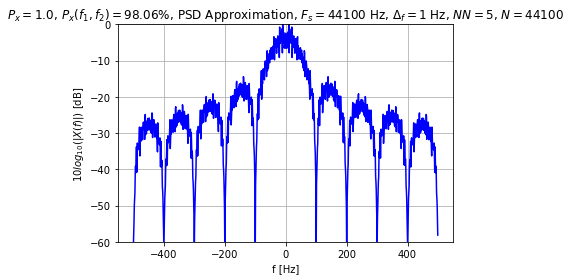

In [9]:
sig = ModuleLab4.pam11(ss, Fs, "rect", [])
_, _ = ModuleLab5.showpsd(sig,[-500, 500, -60], Fs)

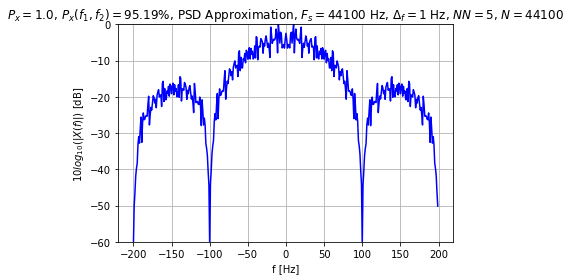

In [10]:
sig = ModuleLab4.pam11(ss, Fs, "rect", [])
_, _ = ModuleLab5.showpsd(sig,[-2 * Fb, 2 * Fb, -60], Fs)

Para o pulso retangular:

$\approx 98\%$ da potência está no intervalo $[-500, 500]$Hz

$\approx 95\%$ da potência está no intervalo $[-2F_B, 2F_B]$Hz

#### Tri

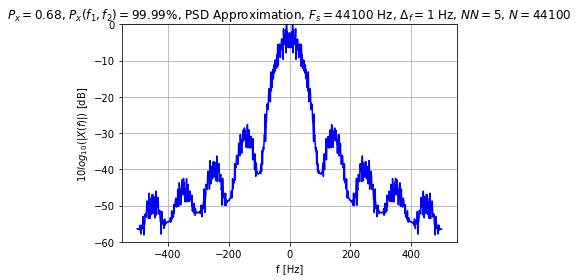

In [11]:
sig = ModuleLab4.pam11(ss, Fs, "tri", [])
_, _ = ModuleLab5.showpsd(sig,[-500, 500, -60], Fs)

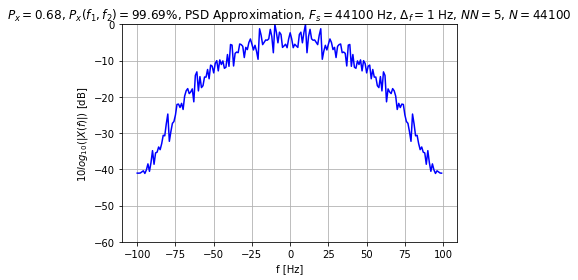

In [12]:
sig = ModuleLab4.pam11(ss, Fs, "tri", [])
_, _ = ModuleLab5.showpsd(sig,[-Fb, Fb, -60], Fs)

Para o pulso triangular:

$\approx 99.98\%$ da potência está no intervalo $[-500, 500]$Hz

$\approx 99.6\%$ da potência está no intervalo $[-F_B, F_B]$Hz

#### Sinc

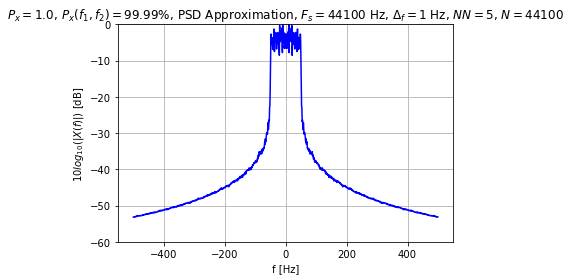

In [13]:
sig = ModuleLab4.pam11(ss, Fs, "sinc", [20, 0])
_, _ = ModuleLab5.showpsd(sig,[-500, 500, -60], Fs)

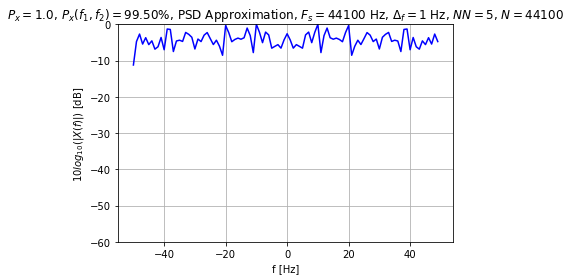

In [14]:
sig = ModuleLab4.pam11(ss, Fs, "sinc", [20, 0])
_, _ = ModuleLab5.showpsd(sig,[-Fb/2, Fb/2, -60], Fs)

Para o pulso sinc:

$\approx 99.97\%$ da potência está no intervalo $[-500, 500]$Hz

$\approx 99.1\%$ da potência está no intervalo $[-F_B/2, F_B/2]$Hz

## d

Primeiro montamos o esquemático fornecido.

<img src="Prints/E1D-1.png">
<img src="Prints/E1D-2.png">

Para cada um dos pulsos pedidos, devemos verificar o $\textit{"rule of thumb"}$/heurística fornecida de concentração da potência do sinal dentro da faixa especificada para cada pulso.

Foi adicionado um segundo $\texttt{QT GUI Number Sink}$ que computa a divisão da potência presente no intervalo considerado pela potência total do sinal.


<img src="Prints/E1D-3.png">

#### <font color="blue"> Para o pulso 'rect':

O intervalo $[-2F_b, 2F_b]$ concentra $\approx 95\%$ da potência do sinal.

<img src="Prints/E1D-RECT.png">
    
    
#### <font color="blue"> Para o pulso 'tri':

O intervalo $[-F_b, F_b]$ concentra $\approx 99.7\%$ da potência do sinal.

<img src="Prints/E1D-TRI.png">

#### <font color="blue"> Para o pulso 'sinc':

O intervalo $[-F_b / 2, F_b / 2]$ concentra $\approx 99.1\%$ da potência do sinal.

<img src="Prints/E1D-SINC.png">
    
    
#### <font color="blue"> Para o pulso 'man':

O intervalo $[-2F_b, 2F_b]$ concentra $\approx 86\%$ da potência do sinal (que pode ser explicado pelo fato de que o pulso $\textit{Machester}$, na prática, equivale a um retangular com o dobro de taxa de sinalização, portanto também analisamos abaixo o intervalo $[-4F_b, 4F_b]$).

<img src="Prints/E1D-MAN.png">
    
O intervalo $[-4F_b, 4F_b]$ concentra $\approx 94\%$ da potência do sinal.

<img src="Prints/E1D-MAN-2.png">
    
#### <font color="blue"> Para o pulso 'rcf':

O intervalo $[-F_b / 2, F_b / 2]$ concentra $\approx 98\%$ da potência do sinal.

<img src="Prints/E1D-RCF.png">

## e

Adicionamos ao esquemático fornecido na questão medições de potência exclusivamente da parte real e da imaginária para verificarmos como a potência está distribuída. Também comparamos os resultados com o esquemático fornecido na introdução do material (que faz o mesmo experimento para uma forma de onda inteiramente real, assumimos mesma amplitude).

<img src="Prints/E1E-1.png">
<img src="Prints/E1E-2.png">

#### <font color = "blue"> Cosine

<img src="Prints/E1E-COS-1.png">
    
#### <font color = "blue"> Rect

<img src="Prints/E1E-REC-1.png">
    
    
#### <font color = "blue"> Tri

<img src="Prints/E1E-TRI-1.png">

Para as 3 formas de onda analisadas a potência da componente real é igual a potência da componente imaginária, que por sua vez é metade da potência total do sinal complexo.

Para o sinal real (do esquemático dado na introdução $\texttt{pwr_001.grc}$) de mesma amplitude, a potência é igual a componente real do sinal complexo.

Este comportamento é coerente com a teoria, por exemplo, para um <font color="blue">cosseno</font> real a potência é dada por:

$P = \big(\frac{A}{\sqrt{2}}\big)^2$

Que pode ser confirmado no esquemático da forma de onda real ($\texttt{pwr_001.grc}$).

Para o sinal complexo

$P = 2 \cdot \big(\frac{A}{\sqrt{2}}\big)^2$

<font color="red"> Novamente, estamos assumindo que a comparação é feita entre cossenos de mesma amplitude.

# E2

In [15]:
reload(ModuleLab4)
reload(ModuleLab5)

<module 'ModuleLab5' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab5/ModuleLab5.py'>

## a

Primero, replicamos os exemplos fornecidos na questão.

In [16]:
Fs = 44100
# Sampling rate
tlen = 5
# Duration in seconds
tt = np.arange(np.round(tlen*Fs))/float(Fs)
# Time axis
nt = np.random.randn(len(tt))
# Gaussian noise n(t)
sig_nt = comsig.sigWave(nt, Fs, tt[0])

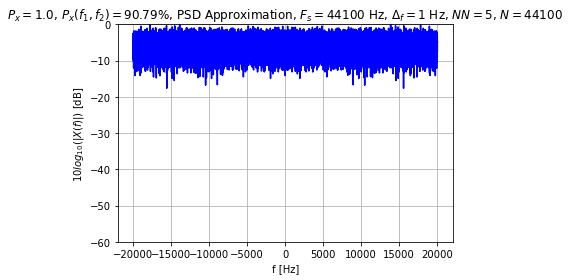

In [17]:
_, _ = ModuleLab5.showpsd(sig_nt,[-20000, 20000, -60], Fs)

In [18]:
Fs = 44100
# Sampling rate
nfL = 4000
# Noise cutoff frequency
tlen = 5
# Duration in seconds
nn = np.random.randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = comsig.sigSequ(nn, 2*nfL, 0)
sig_nt = ModuleLab4.pam11(sig_nn,Fs,'rcf', [20, 0.2])
#Bandlimited noise n(t), rate Fs

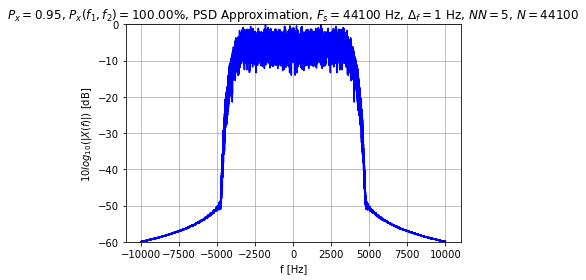

In [19]:
_, _ = ModuleLab5.showpsd(sig_nt,[-10000, 10000, -60], Fs)

Gravamos em arquivos $\texttt{.wav}$ os 3 sinais pedidos para comparar os áudios gerados.

<font color = "blue"> Full white gaussian noise

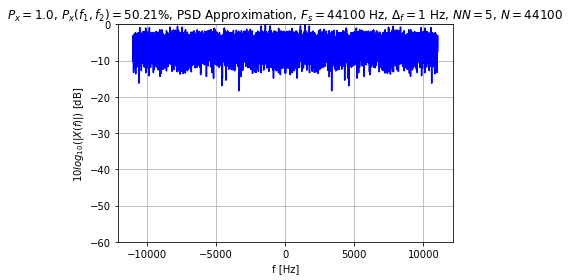

In [20]:
Fs = 44100
# Sampling rate
tlen = 5
# Duration in seconds
tt = np.arange(np.round(tlen*Fs))/float(Fs)
# Time axis
nt = np.random.randn(len(tt))
# Gaussian noise n(t)
sig_nt = comsig.sigWave(nt, Fs, tt[0])
#Bandlimited noise n(t), rate Fs
_, _ = ModuleLab5.showpsd(sig_nt, [-Fs/4, Fs/4, -60], Fs)
ModuleLab1.wavwrite("E2a-whitenoise.wav", Fs, sig_nt.signal())

<font color = "blue"> Bandlimited Gaussian Noise $f_L = 4000$ Hz

4000


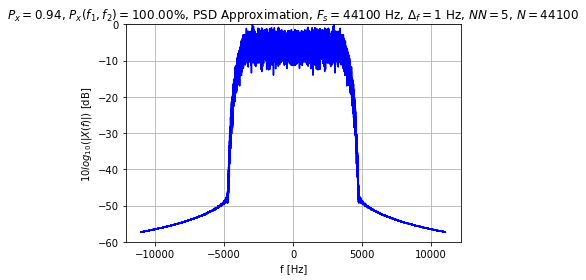

In [21]:
Fs = 44100
# Sampling rate
nfL = 4000
# Noise cutoff frequency
tlen = 5
# Duration in seconds
print(nfL)
nn = np.random.randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = comsig.sigSequ(nn, 2*nfL, 0)
sig_nt = ModuleLab4.pam11(sig_nn,Fs,'rcf', [20, 0.2])
#Bandlimited noise n(t), rate Fs
_, _ = ModuleLab5.showpsd(sig_nt,[-Fs/4, Fs/4, -60], Fs)
ModuleLab1.wavwrite("E2a-fl4kHz.wav", Fs, sig_nt.signal())

<font color = "blue"> Bandlimited Gaussian Noise $f_L = 1000$ Hz

1000


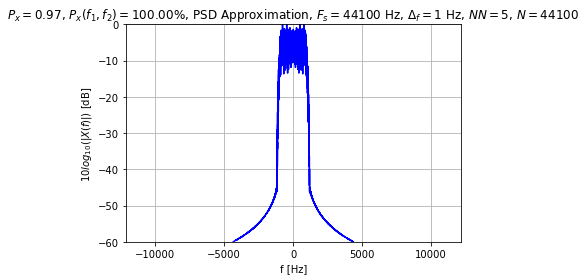

In [22]:
Fs = 44100
# Sampling rate
nfL = 1000
# Noise cutoff frequency
tlen = 5
# Duration in seconds
print(nfL)
nn = np.random.randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = comsig.sigSequ(nn, 2*nfL, 0)
sig_nt = ModuleLab4.pam11(sig_nn,Fs,'rcf', [20, 0.2])
#Bandlimited noise n(t), rate Fs
_, _ = ModuleLab5.showpsd(sig_nt,[-Fs/4, Fs/4, -60], Fs)
ModuleLab1.wavwrite("E2a-fl1kHz.wav", Fs, sig_nt.signal())

Para o primeiro sinal (White Gaussian), temos uma percepção de sinal mais agudo, devido a presença de todas as componentes espectrais dentro da banda considerada. Para o segundo sinal ($f_L = 4000$ Hz) o sinal parece um pouco mais grave, para o terceiro sinal $f_L = 1000$ Hz temos um sinal ainda mais grave devido à eliminação de componentes de alta frequência.

## b

Primeiro, geramos o sinal triangular pedido.

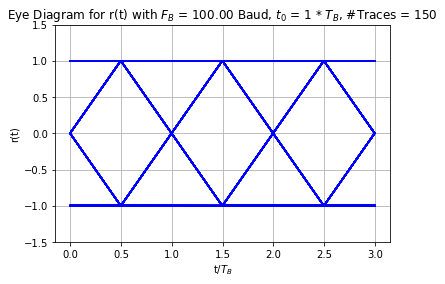

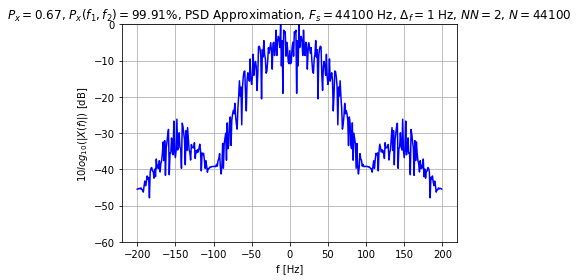

In [23]:
Fs = 44100
FB = 100
tlen = 2
bit_seq = np.random.randint(0, 2, size = (int(tlen * FB)))
polar = 2 * bit_seq - 1

ss = comsig.sigSequ(polar, FB=FB, n0=0)
sig = ModuleLab4.pam11(ss, Fs = Fs, ptype="tri", pparms=[])
L = 1
ModuleLab4.showeye(sig, FB, NTd=150, dispparms=[1, 3, -1.5*L, 1.5*L])
_, _ = ModuleLab5.showpsd(sig,[-2*Fb, 2*Fb, -60], Fs)

Agora, definimos o ruído

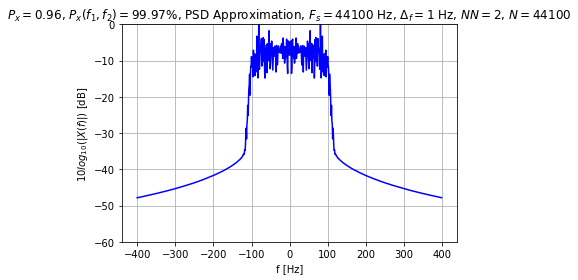

In [24]:
# Sampling rate
nfL = FB
# Noise cutoff frequency
tlen = 2
# Duration in seconds
nn = np.random.randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = comsig.sigSequ(nn, 2*nfL, 0)
sig_nt = ModuleLab4.pam11(sig_nn,Fs,'rcf', [20, 0.2])
#Bandlimited noise n(t), rate Fs
_, _ = ModuleLab5.showpsd(sig_nt,[-4*Fb, 4*Fb, -60], Fs)

In [25]:
A = 0.15

nsig = sig_nt.scale(A)
r = nsig.signal() + sig.signal()
rsig = comsig.sigWave(r, Fs = Fs, t0 = 0)

In [26]:
SNR = 10 * np.log10(sig.get_avgpwr() / nsig.get_avgpwr())
print(f"SNR = {SNR:.2f} dB")

SNR = 14.87 dB


Para SNR $\approx 15$ dB temos o olho "meio fechado":

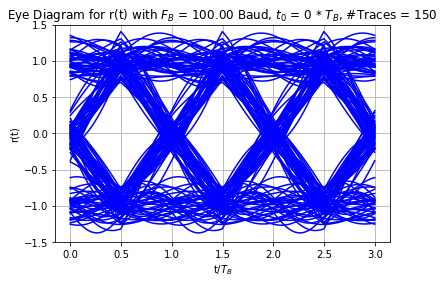

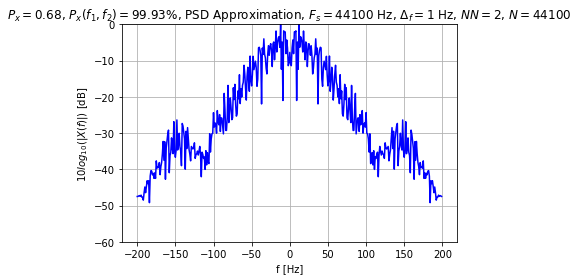

In [27]:
ModuleLab4.showeye(rsig, FB, NTd=150, dispparms=[0, 3, -1.5*L, 1.5*L])
_, _ = ModuleLab5.showpsd(rsig,[-2*Fb, 2*Fb, -60], Fs)

## c

Primeiro, implementamos o esquemático fornecido.

<img src="Prints/E2C-1.png">
<img src="Prints/E2C-2.png">

Geramos os 4 arquivos pedidos: 3 com banda de $2F_B$ para SNR = 20, 10 e 5 dB, e um sinal banda limitado a $F_B/2$ com SNR = 20 dB. Ignoramos as amostras transientes com a utilização do bloco $\texttt{Skip Head}$. Também é necessário ajustar a amplitude do sinal gravado por meio da constante multiplicativa antes de salvar o arquivo.

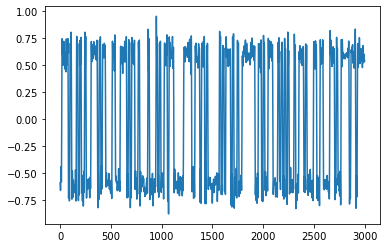

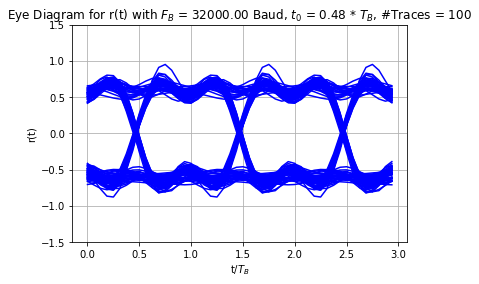

In [28]:
Fs, rt = ModuleLab1.wavread("E2C-gnuradio-recording_20dB.wav")
plt.plot(rt[:3000])
sig = comsig.sigWave(rt, Fs=Fs)
L = 1
ModuleLab4.showeye(sig, FB=32000, NTd=100, dispparms=[0.48, 3, -1.5*L, 1.5*L])

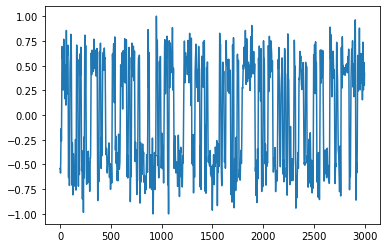

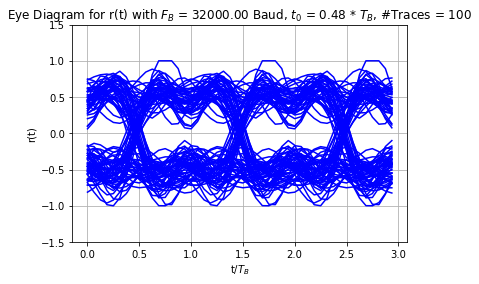

In [29]:
Fs, rt = ModuleLab1.wavread("E2C-gnuradio-recording_10dB.wav")
plt.plot(rt[:3000])
sig = comsig.sigWave(rt, Fs=Fs)
L = 1
ModuleLab4.showeye(sig, FB=32000, NTd=100, dispparms=[0.48, 3, -1.5*L, 1.5*L])

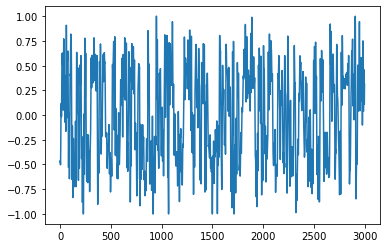

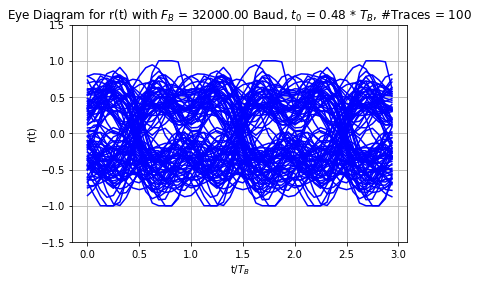

In [30]:
Fs, rt = ModuleLab1.wavread("E2C-gnuradio-recording_5dB.wav")
plt.plot(rt[:3000])
sig = comsig.sigWave(rt, Fs=Fs)
L = 1
ModuleLab4.showeye(sig, FB=32000, NTd=100, dispparms=[0.48, 3, -1.5*L, 1.5*L])

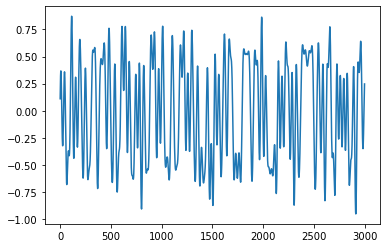

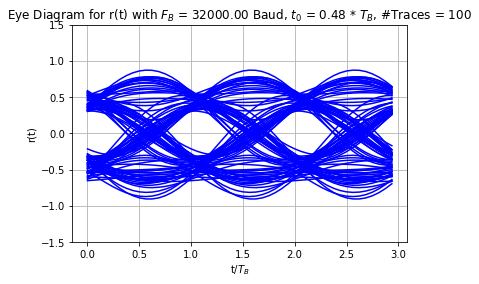

In [31]:
Fs, rt = ModuleLab1.wavread("E2C-gnuradio-recording_20dB_FBover2.wav")
plt.plot(rt[:3000])
sig = comsig.sigWave(rt, Fs=Fs)
L = 1
ModuleLab4.showeye(sig, FB=32000, NTd=100, dispparms=[0.48, 3, -1.5*L, 1.5*L])

Comparando os 3 sinais com banda limitada em $2 F_B$, vemos que a única diferença significativa entre eles é uma maior distorção pelo ruído.

Quando comparamos estes 3 sinais com o obtido utilizando uma banda de $F_B / 2$ (e SNR = 20 dB), pode-se perceber que os instantes de transição estão mais espalhados que a versão de mesma SNR com banda $2 F_B$, ou seja, mesmo que a relação sinal ruído seja a mesma, o fato de utilizarmos uma banda mais estreita para transmitir o sinal provoca distorções (de natureza diferente da distorção provocada pelo ruído branco).

## d

Primeiro, montamos o esquemático pedido.

<img src="Prints/E2D-1.png">
<img src="Prints/E2D-2.png">

#### i)

Conforme leitura acima, a potência total média do ruído complexo é 1, e de ambas as componentes real e imaginária são 0.5. Se A for mudado de 1 para 2, a potência total passa para 4 e de ambas as componentes para 2. A relação da potência com a amplitude é quadrática.

A forma do histograma para o ruído gaussiano é uma gaussiana. A forma teórica da PSD é uniforme (ruído branco).

Se usarmos $f_L = 8000$ Hz, efetivamente estamos deixando passar apenas metada da potência do sinal original (que era branco). A nova potência total será 0.5 (mostrado abaixo).

Como estamos considerando que a densidade de potência do ruído branco é $N_0$, então para A = 1, $\frac{N_0}{2} = -48$ (dB) (de ganho relativo). Também podemos usar $f_L N_0$ como a contribuição de potência do ruído branco para um valor absoluto $N_0 = \frac{1}{16000}$ (usando $f_L = 16000$ Hz).

<img src="Prints/E2D-3.png">

#### ii)

Para ruído uniforme os resultados são mostrados abaixo. Novamente a potência se divide igualmente nas componentes real e imaginária, mas para o ruído uniforme de mesma amplitude a potência total média é menor (0.33 -> $\frac{A^2}{3}$). Quando A = 2 a potência é multiplicada por 4 (novamente a dependência da amplitude e potência é quadrática). A forma do histograma é uniforme (ao contrário do ruído gaussiano). Na frequência, a potência é distribuída praticamente uniformemente na faixa considerada. Quando mudamos $f_L = 8000$ Hz, o histograma perde sua forma uniforme.

$N_0 = \frac{1}{48000}$ (se $f_L = 16000$ Hz).

<img src="Prints/E2D-4.png">
<img src="Prints/E2D-5.png">

# E3

## a

In [32]:
reload(ModuleLab4)
reload(ModuleLab5)

<module 'ModuleLab5' from '/home/rcampello/Main/3m/Simulação de sistemas de comunicação/Labs/Lab5/ModuleLab5.py'>

Comparamos a PSD de sinais transmitidos para os 4 pulsos:

<ul>
    <li> rect
    <li> tri
    <li> sinc
    <li> rcf
</ul>

Para cada um, comparamos as PSDs de $s, s^2$ e $|\frac{ds(t)}{dt}|$ em busca de linhas espectrais que indiquem o valor de $F_B$.

In [33]:
Fs = 44100
Fb = 100

bit_sequence = np.random.randint(0, 2, size = int(Fb * 5))
polar = 2 * bit_sequence - 1

ss = comsig.sigSequ(polar, FB=Fb, n0=0)
stt = np.array(np.round(Fs * (np.arange(0, len(ss)) + ss.get_n0()) / Fb), dtype=np.int32) - int(np.ceil(Fs * (ss.get_n0() - 0.5) / Fb))

Para pulso <font color = "blue"> rect:

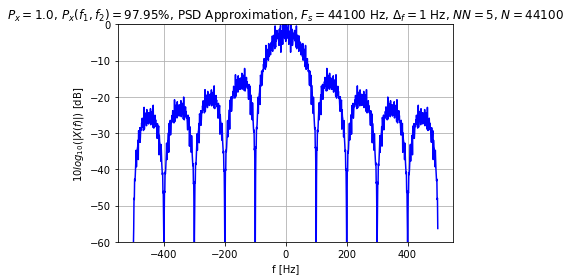

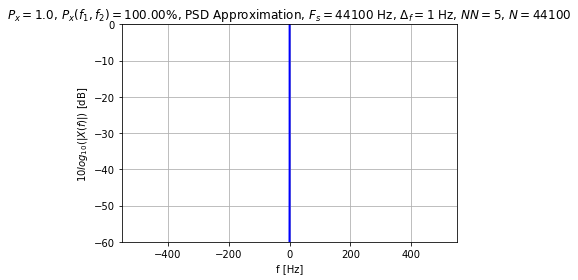

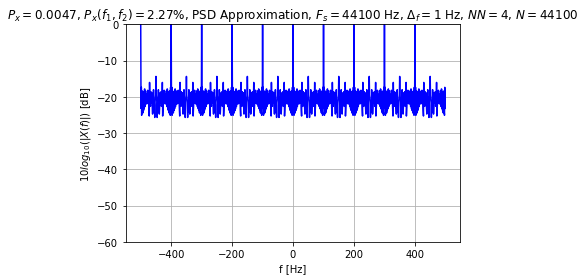

In [34]:
sig = ModuleLab4.pam11(ss, Fs, "rect", [])
sigSquared = comsig.sigWave(sig.signal() ** 2, Fs)
sigDiff = comsig.sigWave(np.abs(np.diff(sig.signal())), Fs)
_, _ = ModuleLab5.showpsd(sig, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigSquared, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigDiff, [-500, 500, -60], Fs)

Para o pulso retangular apenas a PSD de $|\frac{ds(t)}{dt}|$ possui linhas espectrais claras em múltiplos de $F_B$ que podem ser utilizadas para sincronização.

Para pulso <font color = "blue"> tri:

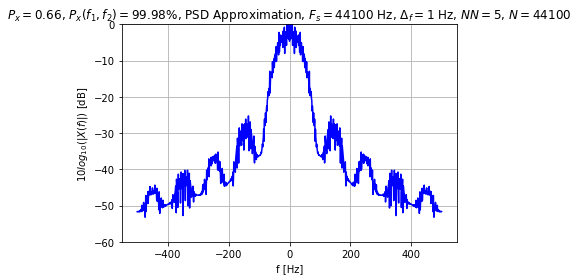

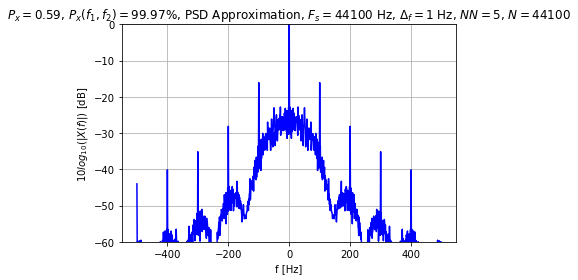

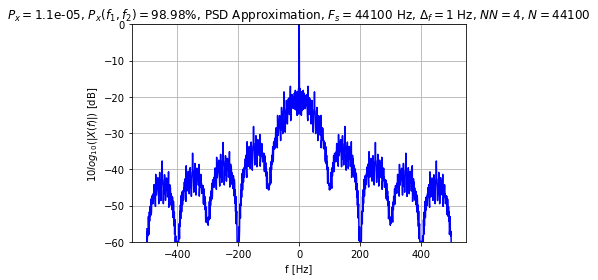

In [35]:
sig = ModuleLab4.pam11(ss, Fs, "tri", [])
sigSquared = comsig.sigWave(sig.signal() ** 2, Fs)
sigDiff = comsig.sigWave(np.abs(np.diff(sig.signal())), Fs)
_, _ = ModuleLab5.showpsd(sig, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigSquared, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigDiff, [-500, 500, -60], Fs)

Para o pulso triangular apenas a PSD de $s^2$ possui linhas espectrais claras em múltiplos de $F_B$ que podem ser utilizadas para sincronização.

Para pulso <font color = "blue"> sinc:

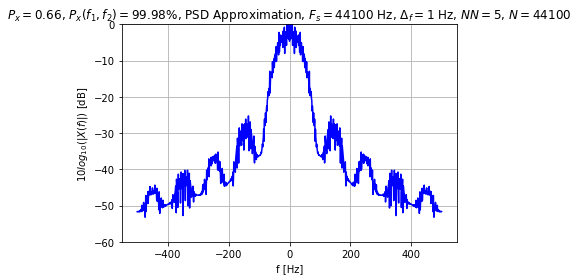

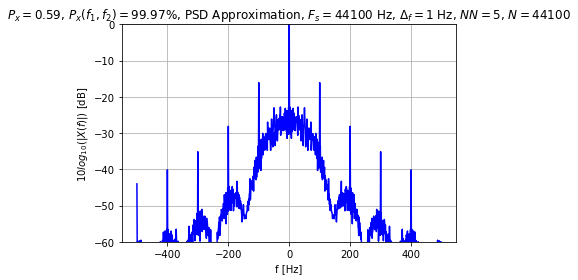

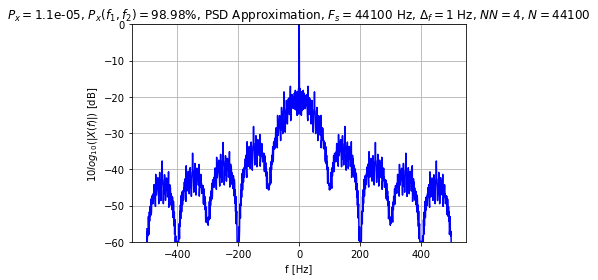

In [36]:
sig = ModuleLab4.pam11(ss, Fs, "tri", [20, 0])
sigSquared = comsig.sigWave(sig.signal() ** 2, Fs)
sigDiff = comsig.sigWave(np.abs(np.diff(sig.signal())), Fs)
_, _ = ModuleLab5.showpsd(sig, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigSquared, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigDiff, [-500, 500, -60], Fs)

Para o pulso sinc apenas a PSD de $s^2$ possui linhas espectrais claras em múltiplos de $F_B$ que podem ser utilizadas para sincronização.

Para pulso <font color = "blue"> rcf:

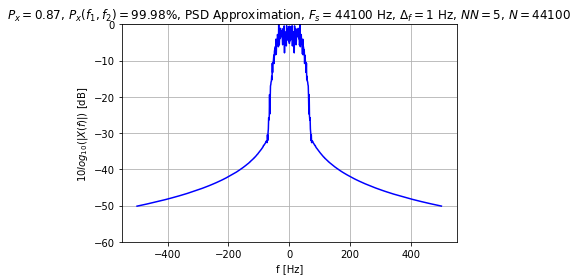

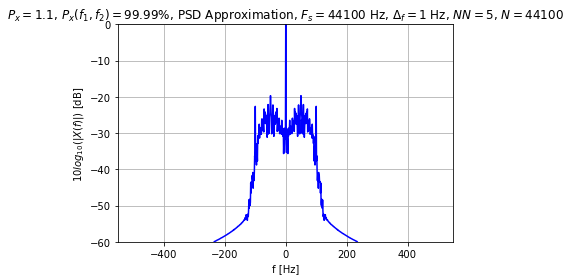

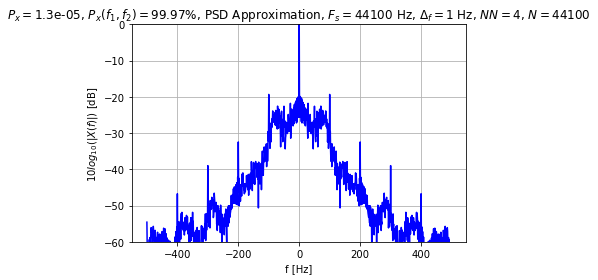

In [37]:
sig = ModuleLab4.pam11(ss, Fs, "rcf", [5, 0.5])
sigSquared = comsig.sigWave(sig.signal() ** 2, Fs)
sigDiff = comsig.sigWave(np.abs(np.diff(sig.signal())), Fs)
_, _ = ModuleLab5.showpsd(sig, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigSquared, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigDiff, [-500, 500, -60], Fs)

Para o pulso rcf ambas PSDs de $s^2$ e $|\frac{ds(t)}{dt}|$ possuem linhas espectrais claras em múltiplos de $F_B$ que podem ser utilizadas para sincronização.

## b

Criamos a função $\texttt{getFbfromRange}$ para extrair o valor de $F_B$ diretamente da PSD, o que é uma versão muito mais precisa do que o feito no Lab4.

Utilizando o mesmo procedimento da letra a para os sinais indicados (com a adição do sinal $s^4(t)$):

In [38]:
def getFbfromRange(ff, Sxf, f1, f2):
    mx = -99999
    ret = 0
    for i, f in enumerate(ff):
        if f1 <= f <= f2:
            if Sxf[i] > mx:
                mx = Sxf[i]
                ret = f
    return ret

In [39]:
Fs, rt = ModuleLab1.wavread("Files/pamsig401.wav")
sig = comsig.sigWave(rt, Fs, 0)

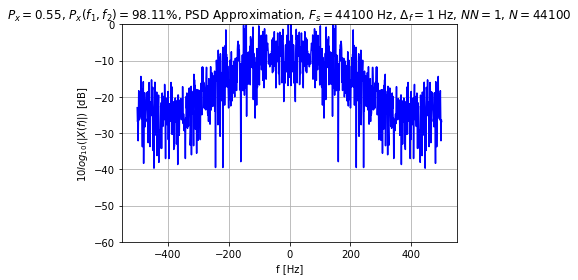

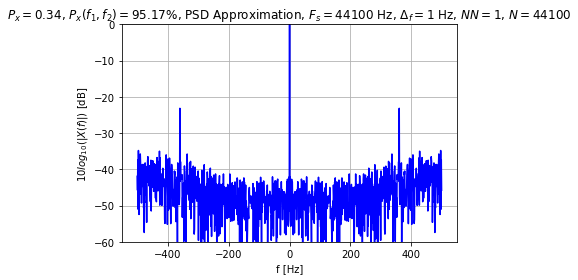

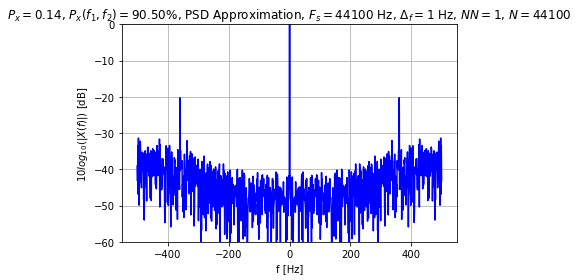

In [40]:
sigSquared = comsig.sigWave(sig.signal() ** 2, Fs)
sig4th = comsig.sigWave(sig.signal() ** 4, Fs)
_, _ = ModuleLab5.showpsd(sig, [-500, 500, -60], Fs)
ff, Sxf = ModuleLab5.showpsd(sigSquared, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sig4th, [-500, 500, -60], Fs)

In [41]:
getFbfromRange(ff, Sxf, 200, 400)

360.0

Portanto, o $F_B$ real do sinal é 360 Hz

In [42]:
Fs, rt = ModuleLab1.wavread("Files/pamsig402.wav")
sig = comsig.sigWave(rt, Fs, 0)

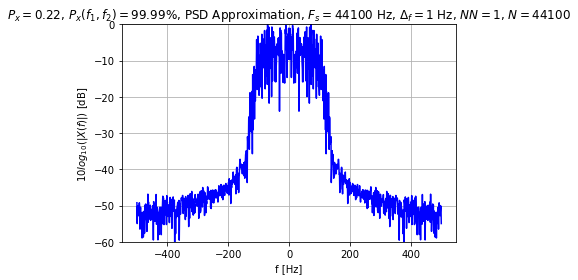

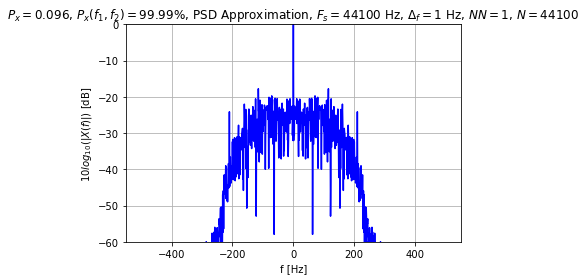

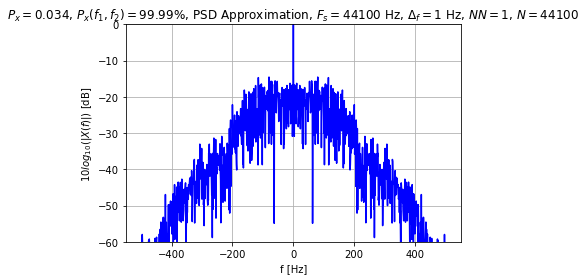

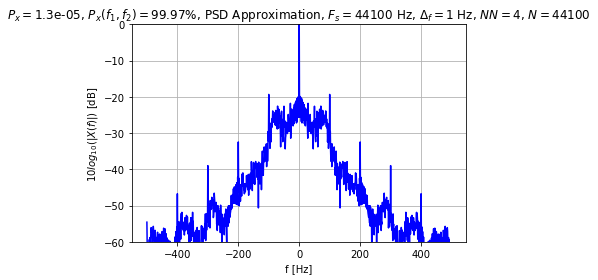

In [43]:
sigSquared = comsig.sigWave(sig.signal() ** 2, Fs)
sig4th = comsig.sigWave(sig.signal() ** 4, Fs)
_, _ = ModuleLab5.showpsd(sig, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigSquared, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sig4th, [-500, 500, -60], Fs)
ff, Sxf = ModuleLab5.showpsd(sigDiff, [-500, 500, -60], Fs)

In [44]:
getFbfromRange(ff, Sxf, 100, 400)

100.0

Portanto, o $F_B$ real do sinal é 210 Hz

In [45]:
Fs, rt = ModuleLab1.wavread("Files/pr1sig401.wav")
sig = comsig.sigWave(rt, Fs, 0)

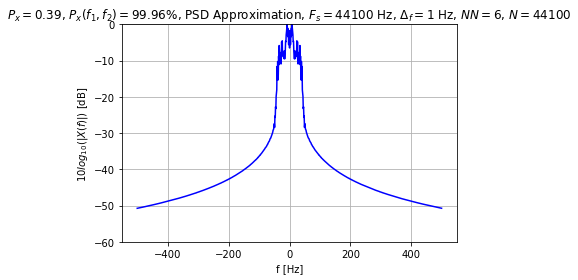

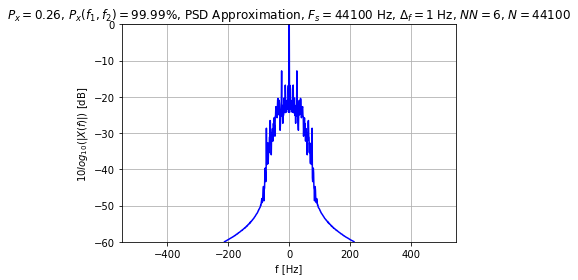

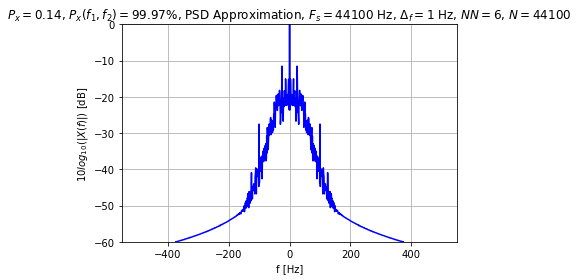

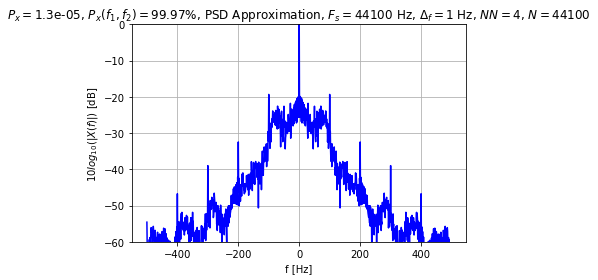

In [46]:
sigSquared = comsig.sigWave(sig.signal() ** 2, Fs)
sig4th = comsig.sigWave(sig.signal() ** 4, Fs)
_, _ = ModuleLab5.showpsd(sig, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigSquared, [-500, 500, -60], Fs)
ff, Sxf = ModuleLab5.showpsd(sig4th, [-500, 500, -60], Fs)
_, _ = ModuleLab5.showpsd(sigDiff, [-500, 500, -60], Fs)

Pelo gráfico de $s^4(t)$, pode-se perceber a componente espectral destacada em $F_B = 100$ Hz

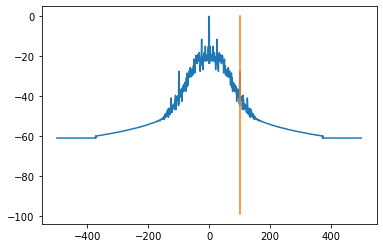

In [47]:
plt.plot(ff, Sxf)
plt.plot([100] * 100, [-i for i in range(100)])